In [1]:
# Notebook for estimating a case-hospitalization rate, per age
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
#%matplotlib widget
plt.rcParams['figure.figsize'] = (14,10)
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 3
#%matplotlib widget
# plt.style.use('ggplot')
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
locale.setlocale(locale.LC_ALL,"Danish")
# ax = plt.gca()
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

import os
# import csv
import math


from datetime import date


saveFigures = True
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
#Settings for plotting
fs_label = 14

parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label
             }

plt.rcParams.update(parameters)

#locale.setlocale(locale.LC_TIME, "Danish") 

In [3]:
ssidatapath = "ssi_data"
rootdir = os.getcwd() +"/" + ssidatapath

In [4]:
dfAdm = pd.read_excel('Admitted/Admitted.xlsx')
dfAdm = dfAdm.transpose()
dfAdm.columns = dfAdm.iloc[0]
dfAdm = dfAdm.drop(['Aldersgruppe']) 
curDates =  pd.to_datetime(dfAdm.index,format='%d_%m_%Y')

In [5]:
# dfCase = pd.read_csv(latestdir+'\\Cases_by_age.csv',delimiter=';')
dfCase = pd.DataFrame(columns=dfAdm.columns)
dfTest = pd.DataFrame(columns=dfAdm.columns)
dfPosP = pd.DataFrame(columns=dfAdm.columns)

In [6]:
# for d in curDates:
for k in range(0,len(curDates)):
    d = curDates[k]
    curIndex = dfAdm.index[k]

    thisDateStr = d.strftime('%Y-%m-%d')
    curDir = rootdir + '/SSI_data_' + thisDateStr 
    curFilePath = curDir + '/Cases_by_age.csv'
    
    print(f"Attempt: {curFilePath}")

    try:
        curdf = pd.read_csv(curFilePath,delimiter=';',dtype=str)

        curdf['Antal_bekræftede_COVID-19'] = pd.to_numeric(curdf['Antal_bekræftede_COVID-19'].astype(str).apply(lambda x: x.replace('.','')))
        curdf['Antal_testede'] = pd.to_numeric(curdf['Antal_testede'].astype(str).apply(lambda x: x.replace('.','')))
        curdf['Procent_positive'] = pd.to_numeric(curdf['Procent_positive'].astype(str).apply(lambda x: x.replace(',','.')))

        dfCase.loc[curIndex] = curdf['Antal_bekræftede_COVID-19'].values
        dfTest.loc[curIndex] = curdf['Antal_testede'].values
        dfPosP.loc[curIndex] = curdf['Procent_positive'].values
    except:
        print(f"Not found: {curFilePath}")


Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2020-11-10/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2020-11-17/Cases_by_age.csv
Not found: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2020-11-17/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2020-11-24/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2020-12-01/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2020-12-08/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2020-12-15/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2020-12-22/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2020-12-29/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2021-01-05/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2021-01-12/Cases_by_age.csv
Attempt: d:\Pandemix\Github\DanskeData/ssi_data/SSI_data_2021-0

In [7]:
dfCaseDiff = dfCase.diff().iloc[1:]
dfAdmDiff = dfAdm.diff().iloc[1:]
dfCaseDiff
dfAdmDiff

#dfAdmDiff.iloc[1:]#.values

Aldersgruppe,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
17_11_2020,2,4,13,18,26,49,55,63,42,14,286
24_11_2020,8,1,16,19,28,49,50,59,70,11,311
01_12_2020,4,1,7,12,32,45,33,63,59,15,271
08_12_2020,6,7,23,32,41,61,67,110,80,21,448
15_12_2020,12,14,27,48,59,102,116,120,103,36,637
22_12_2020,22,15,42,70,95,143,152,236,185,54,1014
29_12_2020,15,12,48,50,98,148,170,285,212,61,1099
05_01_2021,5,14,37,58,72,121,161,211,224,73,976
12_01_2021,12,6,33,37,49,108,116,206,211,58,836
19_01_2021,12,3,15,32,46,87,97,167,152,57,668


In [8]:
caseAdmRate = np.divide(dfAdmDiff.iloc[3:].values, dfCaseDiff[1:-1])
# caseAdmRate = np.divide(dfAdmDiff.iloc[2:].values,dfCaseDiff[:-2])
# dfCaseDiff.iloc[:-1]
# dfAdmDiff.iloc[1:]

caseAdmRate

Aldersgruppe,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
01_12_2020,0.010363,0.004025,0.013789,0.027421,0.031322,0.049674,0.104524,0.277778,0.506329,0.488372,0.050179
08_12_2020,0.015852,0.005162,0.010702,0.029003,0.030777,0.05879,0.148528,0.234834,0.528205,0.5625,0.049572
15_12_2020,0.017201,0.00391,0.009192,0.024014,0.030794,0.048889,0.101945,0.316354,0.548961,0.514286,0.047632
22_12_2020,0.008329,0.003075,0.010311,0.015538,0.028299,0.043542,0.091006,0.24173,0.456897,0.438849,0.045624
29_12_2020,0.003003,0.005937,0.012111,0.023025,0.026746,0.045318,0.10871,0.206055,0.370861,0.357843,0.053415
05_01_2021,0.012232,0.003421,0.013121,0.018649,0.025614,0.051973,0.085169,0.217759,0.349917,0.295918,0.058331
12_01_2021,0.015524,0.002187,0.007511,0.022743,0.032258,0.05241,0.097,0.24238,0.298039,0.303191,0.060606
19_01_2021,0.008032,0.006954,0.012322,0.02967,0.05332,0.055766,0.125201,0.271663,0.372032,0.135484,0.075829
26_01_2021,0.007092,0.007491,0.016222,0.036364,0.041026,0.037175,0.09434,0.275974,0.269076,0.461538,0.064365
02_02_2021,0.015924,0.007895,0.023121,0.02444,0.037773,0.052192,0.121875,0.278302,0.267176,0.233333,0.065415


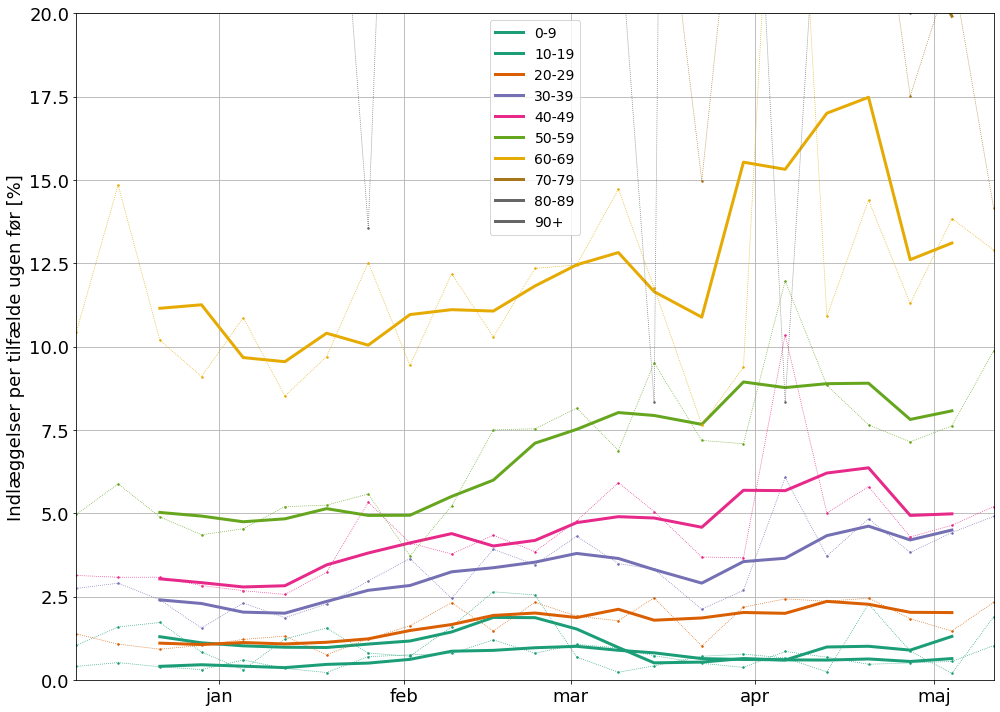

In [9]:
# caseAdmRate.mean()

# allCols = caseAdmRate.columns[:-1]
allCols = caseAdmRate.columns

plotDates = curDates[2+2:]
# plotDates = curDates[3:]

fig,ax1 = plt.subplots()

finalEstimates = []

numToShow = len(allCols)-1
cmap = plt.cm.get_cmap('Dark2',numToShow)
for k in range(0,numToShow):
    curCol = allCols[k]

    ax1.plot(plotDates,100*caseAdmRate[curCol],'.:',markersize=3,linewidth=0.75,color=cmap(k))
    meanWidth = 4
    ax1.plot(rnTime(plotDates,meanWidth),rnMean(100*caseAdmRate[curCol],meanWidth),color=cmap(k),label=curCol)

    # Collect the final mean values
    curFinalMean = rnMean(100*caseAdmRate[curCol],meanWidth)[-1]
    finalEstimates.append(curFinalMean)

ax1.legend()
ax1.set_ylim([0,20])
# ax1.set_ylim([0,100])
# ax1.set_ylim(bottom=0)
ax1.set_xlim([plotDates[0],plotDates[-1]])

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

curFont = 18
ax1.set_ylabel('Indlæggelser per tilfælde ugen før [%]',fontsize=curFont)
plt.xticks(fontsize=curFont)
plt.yticks(fontsize=curFont)
plt.grid()

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/case_hospitalization_per_time')

In [10]:
# caseAdmRate.mean()

# allCols = caseAdmRate.columns[:-1]
allCols = caseAdmRate.columns

plotDates = curDates[2:]
# plotDates = curDates[3:]

# fig,ax1 = plt.subplots()

finalEstimates = []

numToShow = len(allCols)-1
# numToShow = len(allCols)-4
cmap = plt.cm.get_cmap('Dark2',numToShow)
for k in range(0,numToShow):
    curCol = allCols[k]

    # ax1.plot(plotDates,100*caseAdmRate[curCol],'.:',markersize=3,linewidth=0.75,color=cmap(k))
    meanWidth = 4
    # ax1.plot(rnTime(plotDates,meanWidth),rnMean(100*caseAdmRate[curCol],meanWidth),color=cmap(k),label=curCol)

    # Collect the final mean values
    curFinalMean = rnMean(100*caseAdmRate[curCol],meanWidth)[-1]
    finalEstimates.append(curFinalMean)

# ax1.legend()
# ax1.set_ylim([0,20])
# # ax1.set_ylim([0,100])
# # ax1.set_ylim(bottom=0)
# ax1.set_xlim([plotDates[0],plotDates[-1]])

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# curFont = 18
# ax1.set_ylabel('Indlæggelser per tilfælde ugen før [%]',fontsize=curFont)
# plt.xticks(fontsize=curFont)
# plt.yticks(fontsize=curFont)
# plt.grid()

# plt.tight_layout()

# if saveFigures:
#     plt.savefig('figs/case_hospitalization_per_time')

In [11]:
# print(allCols.values[:numToShow])
# print(finalEstimates)
print(f'Alderstrin:   {allCols.values[0]}: {finalEstimates[0]:.1f} %')
for k in range(1,numToShow):
    print(f'Alderstrin: {allCols.values[k]}: {finalEstimates[k]:.1f} %')

Alderstrin:   0-9: 1.3 %
Alderstrin: 10-19: 0.6 %
Alderstrin: 20-29: 2.0 %
Alderstrin: 30-39: 4.5 %
Alderstrin: 40-49: 5.0 %
Alderstrin: 50-59: 8.1 %
Alderstrin: 60-69: 13.1 %
Alderstrin: 70-79: 19.9 %
Alderstrin: 80-89: 42.0 %
Alderstrin: 90+: 39.2 %


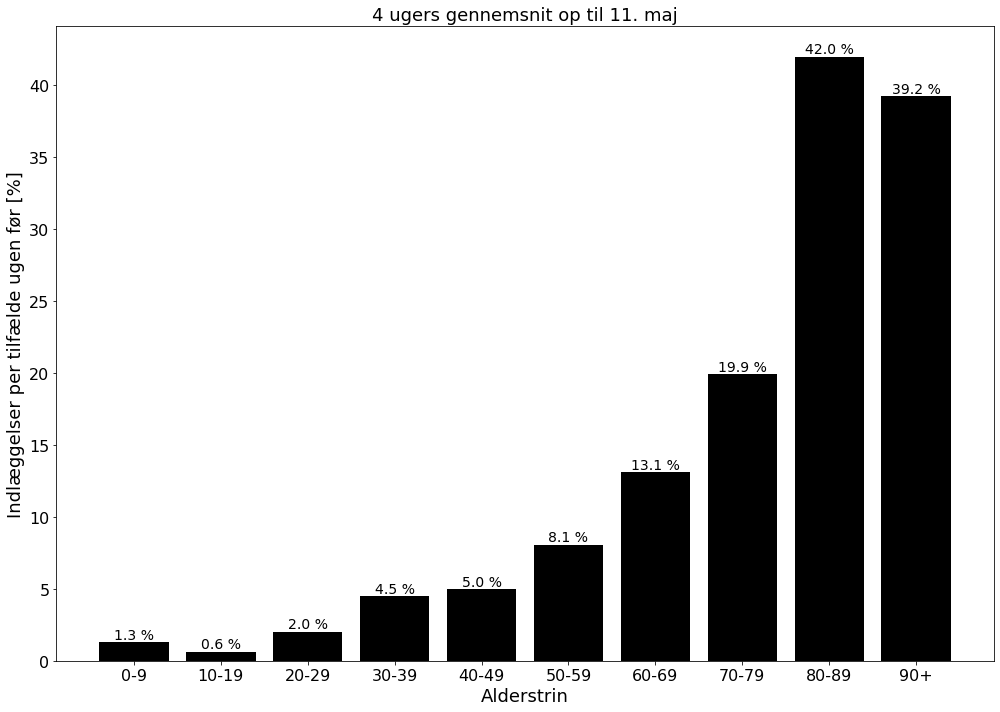

In [12]:
plt.figure()
plt.bar(range(0,numToShow),finalEstimates,color='k')

for i,v in enumerate(finalEstimates):
    plt.text(i,v+0.5,f'{v:.1f} %',fontsize=14,va='center',ha='center')

curFont = 18
plt.yticks(fontsize=curFont-2)
plt.xticks(range(0,numToShow),labels=allCols.values[:-1],fontsize=curFont-2)
plt.ylabel('Indlæggelser per tilfælde ugen før [%]',fontsize=curFont)
plt.xlabel('Alderstrin',fontsize=curFont)

plt.title('4 ugers gennemsnit op til '+plotDates[-1].strftime('%d. %b'))
plt.tight_layout()

if saveFigures:
    plt.savefig('figs/HospitalizationPerAge')

In [13]:
# Calculation of size of age-group
dfAges = pd.read_excel('DKfolketal2021clean.xlsx')

In [14]:
DK_age = []
DK_age.append(dfAges.iloc[0:10].Antal.sum())
DK_age.append(dfAges.iloc[10:20].Antal.sum())
DK_age.append(dfAges.iloc[20:30].Antal.sum())
DK_age.append(dfAges.iloc[30:40].Antal.sum())
DK_age.append(dfAges.iloc[40:50].Antal.sum())
DK_age.append(dfAges.iloc[50:60].Antal.sum())
DK_age.append(dfAges.iloc[60:70].Antal.sum())
DK_age.append(dfAges.iloc[70:80].Antal.sum())
DK_age.append(dfAges.iloc[80:90].Antal.sum())
DK_age.append(dfAges.iloc[90:].Antal.sum())
DK_age = np.array(DK_age)
DK_age

array([610210, 680040, 778740, 696679, 748824, 801166, 667583, 574697,
       236648,  45458], dtype=int64)

In [15]:
# R0 = 2.5
# R0 = 2.5 * 1.5
R0 = 1.7
herdImmunityThreshold = 1-(1/R0)

vaccPerc = 0.010
immuPerc = 0.08
vaccPerc = 0.24
immuPerc = 0.08

vaccPercList = [0,0.008,0.10,0.131,0.18,0.21,0.52,0.93,0.95,0.94]
# herdImmunityThresholdList = np.

missingToInfectPerc = herdImmunityThreshold - vaccPerc - immuPerc
print(missingToInfectPerc)
missingToInfect = np.multiply(missingToInfectPerc,DK_age)
print(missingToInfect)

missingToInfect



0.09176470588235293
[55995.74117647 62403.67058824 71460.84705882 63930.54352941
 68715.61411765 73518.76235294 61260.55764706 52736.90117647
 21715.93411765  4171.44      ]


array([55995.74117647, 62403.67058824, 71460.84705882, 63930.54352941,
       68715.61411765, 73518.76235294, 61260.55764706, 52736.90117647,
       21715.93411765,  4171.44      ])

In [16]:
toAdm = np.round(np.multiply(missingToInfect,np.multiply(finalEstimates,0.01)))
print(allCols.values[:-1])
print(toAdm)
toAdm[0:6].sum()

['0-9' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-89'
 '90+']
[  729.   398.  1442.  2874.  3423.  5934.  8030. 10502.  9113.  1636.]


14800.0

# Load vaccine data


In [17]:
ssivaccpath = "ssi_vacc"
rootdirvacc = os.getcwd() +"/" + ssivaccpath 

In [18]:
for subdir, dirs, files in os.walk(rootdirvacc):
    if not len(files) == 0:
        latestdir = subdir 
        # latestDate = pd.to_datetime(subdir[-10:])

print(latestdir)
latestDate = pd.to_datetime(latestdir[-21:-11]) # Assuming everything is in a "\Vaccine_DB" subdir
print(latestDate)


# # thisDateStr = d.strftime('%Y-%m-%d')
# # curDir = rootdir + '/SSI_data_' + thisDateStr 
# # curFilePath = curDir + '/Cases_by_age.csv'
# # curdf = pd.read_csv(curFilePath,delimiter=';',dtype=str)

d:\Pandemix\Github\DanskeData/ssi_vacc\SSI_vacc_2021-05-16\Vaccine_DB
2021-05-16 00:00:00


In [29]:
curFilePath = latestdir + '\\Vaccinationer_region_aldgrp_koen.csv'
dfVac = pd.read_csv(curFilePath,delimiter=',', encoding='latin_1')
dfVac.columns

Index(['Regionsnavn', 'Aldersgruppe', 'sex', 'Antal første vacc.',
       'Antal faerdigvacc.'],
      dtype='object')

In [32]:
# dfVac

In [34]:
dfVacSum = pd.DataFrame(columns=['Aldersgruppe','Foerste','Faerdig'])

# for curAge in allCols[:-1]:
for i in range(0,len(allCols)-1):
    curAge = allCols[i]

    # print(curAge)

    # curAge = '70-79'
    # dfVac[dfVac.Aldersgruppe == curAge]
    
    curFirst = dfVac[dfVac.Aldersgruppe == curAge]['Antal første vacc.'].sum()
    curBoth  = dfVac[dfVac.Aldersgruppe == curAge]['Antal faerdigvacc.'].sum()

    dfVacSum.loc[i] = [curAge,curFirst,curBoth]
dfVacSum

,Aldersgruppe,Foerste,Faerdig
0,0-9,6,3
1,10-19,4266,2750
2,20-29,55290,33172
3,30-39,65864,42829
4,40-49,93750,62505
5,50-59,140946,83750
6,60-69,465233,116436
7,70-79,544949,421171
8,80-89,229261,221890
9,90+,42908,41772


In [35]:
doneVacc = dfVacSum.Faerdig.values
doneVacc = dfVacSum.Foerste.values

In [36]:
## Vaccinated
vaccCount = dfVacSum.Foerste.values
vaccRatio = np.divide(vaccCount,DK_age)
vaccFullCount = dfVacSum.Faerdig.values
vaccFullRatio = np.divide(vaccFullCount,DK_age)

## Natural immunization
# Seroprevalence, bloddonerer, uge 16:
# 17-29: 9,6%
# 30-49: 6,3%
# 50-69: 5,0%
# I alt: 6,7%
imm0_29 = 0.1
imm30_49 = 0.075
imm50_69 = 0.06
immuRatio = [imm0_29,imm0_29,imm0_29,imm30_49,imm30_49,imm50_69,imm50_69,imm50_69,imm50_69,imm50_69]
immuCount = np.multiply(immuRatio,DK_age)

## Total immune
allImmuRatio = vaccRatio + immuRatio - np.multiply(vaccRatio,immuRatio)
allImmuCount = np.multiply(allImmuRatio,DK_age)
allImmuFullRatio = vaccFullRatio + immuRatio - np.multiply(vaccFullRatio,immuRatio)
allImmuFullCount = np.multiply(allImmuFullRatio,DK_age)

## Herd immunity threshold
# R0 = 2.5
# R0 = 2.5 * 1.5
R0 = 1.7
herdImmunityThreshold = 1-(1/R0)
herdRatio = herdImmunityThreshold * np.ones(DK_age.shape)
herdCount = herdImmunityThreshold * DK_age


## Missing immunization before herd immunity is reached
missImmuRatio = herdRatio - allImmuRatio
missImmuFullRatio = herdRatio - allImmuFullRatio
# If below zero, set to zero
missImmuRatio[missImmuRatio < 0] = 0
missImmuFullRatio[missImmuFullRatio < 0] = 0
missImmuFullCount = np.multiply(missImmuFullRatio,DK_age)
missImmuCount = np.multiply(missImmuRatio,DK_age)
# missImmuCount = herdCount - allImmuCount

# Calculate the herd immunity numbers, but for a higher R0 (corresponding to B117 in the winter)
R0_winter = 2.5 * 1.5
herdImmunityThreshold_winter = 1-(1/R0_winter)
herdRatio_winter = herdImmunityThreshold_winter * np.ones(DK_age.shape)
herdCount_winter = herdImmunityThreshold_winter * DK_age

missImmuRatio_winter = herdRatio_winter - allImmuRatio
missImmuFullRatio_winter = herdRatio_winter - allImmuFullRatio
missImmuRatio_winter[missImmuRatio_winter < 0] = 0
missImmuFullRatio_winter[missImmuFullRatio_winter < 0] = 0
missImmuFullCount_winter = np.multiply(missImmuFullRatio_winter,DK_age)
missImmuCount_winter = np.multiply(missImmuRatio_winter,DK_age)

In [37]:
fullPop = DK_age.sum()
fullImmu = allImmuCount.sum()
fullVacc = vaccCount.sum()
fullVaccFull = vaccFullCount.sum()
fullMissImmu = missImmuCount.sum()
fullMissImmuFull = missImmuFullCount.sum()
fullMissImmu_winter = missImmuCount_winter.sum()
fullMissImmuFull_winter = missImmuFullCount_winter.sum()

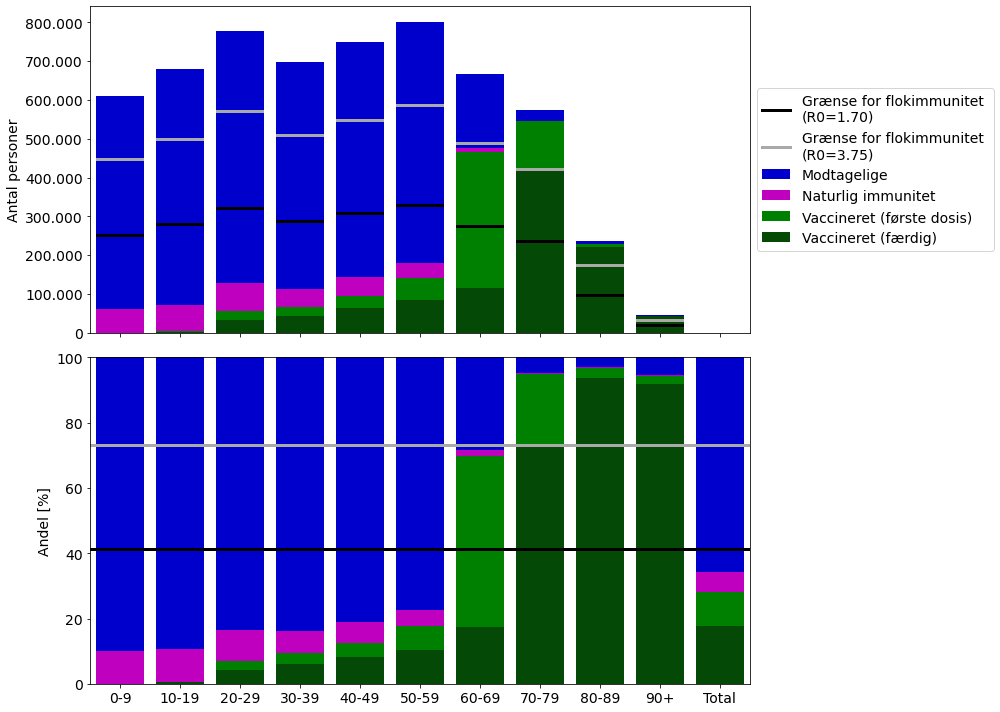

In [38]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

xVals = range(0,10)

curWidth = 0.75

ax1.bar(xVals,DK_age,label='Modtagelige',color='mediumblue')
# ax1.bar(range(0,10),np.multiply(herdImmuList,DK_age),edgecolor='k',label='Grænse for flokimmunitet')
for k in range(0,10):
    ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount[k],herdCount[k]],'k')
    ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount_winter[k],herdCount_winter[k]],'darkgrey')

# Plot an extra, for legend label
ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount[k],herdCount[k]],'k',label=f'Grænse for flokimmunitet \n(R0={R0:1.2f})')
ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount_winter[k],herdCount_winter[k]],'darkgrey',label=f'Grænse for flokimmunitet \n(R0={R0_winter:1.2f})')

ax1.bar(xVals,allImmuCount,color='m',label='Naturlig immunitet')
ax1.bar(xVals,vaccCount,color='g',label='Vaccineret (første dosis)')
ax1.bar(xVals,vaccFullCount,color='xkcd:darkgreen',label='Vaccineret (færdig)')


# ax1.bar(10,fullPop,color='mediumblue')
# ax1.bar(10,fullImmu,color='m')
# ax1.bar(10,fullVacc,color='g')
# ax1.bar(10,fullVaccFull,color='xkcd:darkgreen')


ax2.bar(xVals,100 * np.ones(DK_age.shape),color='mediumblue',label='Modtagelige')
ax2.plot([-2,11],100 * herdImmunityThreshold*np.ones((2,)),'k',label=f'Grænse for flokimmunitet (R0={R0:1.2f})')
ax2.plot([-2,11],100 * herdImmunityThreshold_winter*np.ones((2,)),'darkgrey',label=f'Grænse for flokimmunitet (R0={R0_winter:1.2f})')

ax2.bar(xVals,100 * allImmuRatio,color='m',label='Naturlig immunitet')
ax2.bar(xVals,100 * vaccRatio,color='g',label='Vaccineret (Første dosis')
ax2.bar(xVals,100 * vaccFullRatio,color='xkcd:darkgreen',label='Vaccineret (færdig)')

ax1.set_xticks(xVals)
ax1.set_xticklabels(allCols[:-1])

ax2.bar(10,100 * np.divide(fullPop,fullPop),color='mediumblue')
ax2.bar(10,100 * np.divide(fullImmu,fullPop),color='m')
ax2.bar(10,100 * np.divide(fullVacc,fullPop),color='g')
ax2.bar(10,100 * np.divide(fullVaccFull,fullPop),color='xkcd:darkgreen')




curTicks = np.append(xVals,10)
curTickLabels = np.append(allCols[:-1],'Total')
ax1.set_xticks(curTicks)
ax1.set_xticklabels(curTickLabels)

ax1.set_xlim([-0.5,10.5])


ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax2.set_ylim([0,100])

# Period as thousands separator
ax1.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)


ax1.set_ylabel('Antal personer')
ax2.set_ylabel('Andel [%]')

# ax2.legend()
plt.tight_layout()
if saveFigures:
    plt.savefig('figs/BefolkningFlokImmunitetOgVaccineret')

# Show how many can potentially be infected

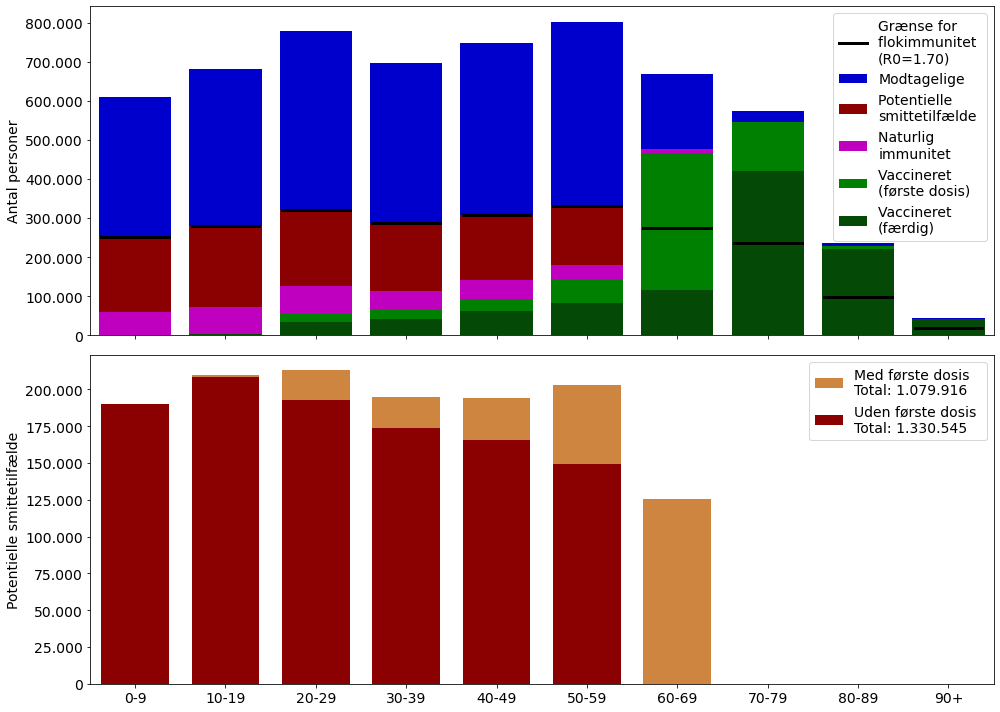

In [39]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

xVals = np.arange(0,10)

curWidth = 0.75

ax1.bar(xVals,DK_age,label='Modtagelige',color='mediumblue')
# ax1.bar(range(0,10),np.multiply(herdImmuList,DK_age),edgecolor='k',label='Grænse for flokimmunitet')
for k in range(0,10):
    ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount[k],herdCount[k]],'k')
    # ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount_winter[k],herdCount_winter[k]],'darkgrey')

# Plot an extra, for legend label
ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount[k],herdCount[k]],'k',label=f'Grænse for \nflokimmunitet \n(R0={R0:1.2f})')
# ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount_winter[k],herdCount_winter[k]],'darkgrey',label=f'Grænse for flokimmunitet \n(R0={R0_winter:1.2f})')


ax1.bar(xVals,missImmuCount+allImmuCount,color='darkred',label='Potentielle \nsmittetilfælde')
ax1.bar(xVals,allImmuCount,color='m',label='Naturlig \nimmunitet')
ax1.bar(xVals,vaccCount,color='g',label='Vaccineret \n(første dosis)')

# ax1.bar(xVals,missImmuFullCount+allImmuFullCount,color='darkred',label='Potentielle smittetilfælde')
# ax1.bar(xVals,allImmuFullCount,color='m',label='Naturlig immunitet')
ax1.bar(xVals,vaccFullCount,color='xkcd:darkgreen',label='Vaccineret \n(færdig)')


# curWidth = 0.4
# ax2.bar(xVals-curWidth/2,missImmuCount,width=curWidth,color='darkred',label='Ved immunitet efter først dosis')
# ax2.bar(xVals+curWidth/2,missImmuFullCount,width=curWidth,color='red',label='Ved immunitet efter anden dosis')
ax2.bar(xVals,missImmuFullCount,width=curWidth,color='peru',label=f'Med første dosis \nTotal: {fullMissImmu:,.0f}'.replace(',','.'))
ax2.bar(xVals,missImmuCount,width=curWidth,color='darkred',label=f'Uden første dosis \nTotal: {fullMissImmuFull:,.0f}'.replace(',','.'))
# ax2.bar(10,fullMissImmu,color='darkred')

ax1.set_xticks(xVals)
ax1.set_xticklabels(allCols[:-1])


# curTicks = np.append(xVals,10)
# curTickLabels = np.append(allCols[:-1],'Total')
# ax1.set_xticks(curTicks)
# ax1.set_xticklabels(curTickLabels)

ax1.set_xlim([-0.5,9.5])


# ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
# ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax1.legend(loc='upper right')
ax2.legend()

# Period as thousands separator
ax1.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)
ax2.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)


ax1.set_ylabel('Antal personer')
ax2.set_ylabel('Potentielle smittetilfælde')



plt.tight_layout()
if saveFigures:
    plt.savefig('figs/BefolkningModtagelige')

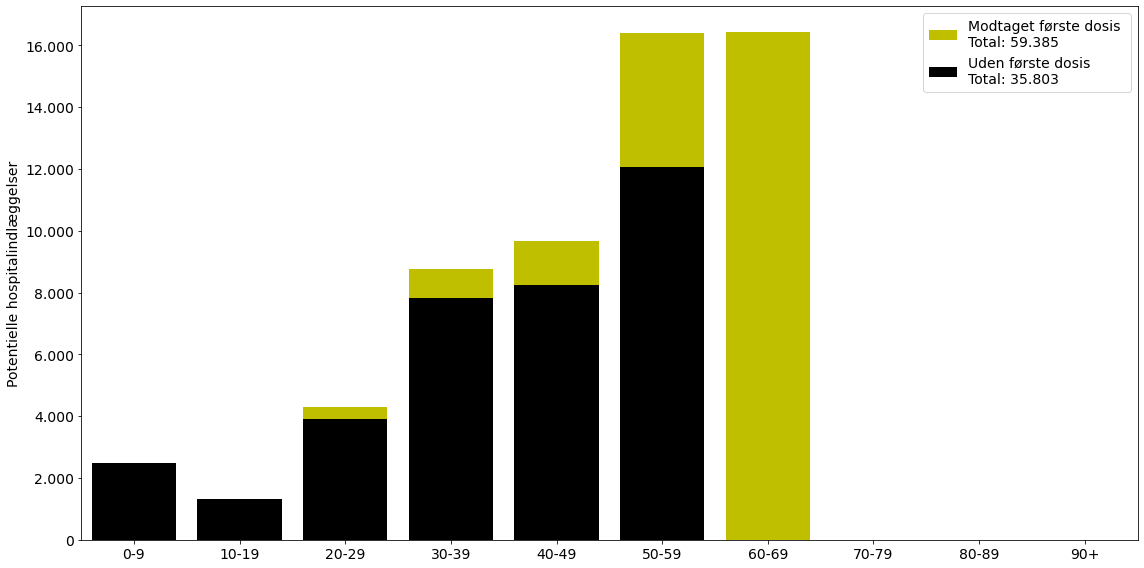

In [40]:
# Number of potential infections that will result in hospitalization
fig,ax1 = plt.subplots(1,1,figsize=(16,8))

xVals = np.arange(0,10)

ratioHosp = np.multiply(finalEstimates,0.01)

poteOneDose = np.multiply(missImmuFullCount,ratioHosp)
poteNoDose = np.multiply(missImmuCount,ratioHosp)

poteOneDoseTot = poteOneDose.sum()
poteNoDoseTot = poteNoDose.sum()

# ax1.bar(xVals,missImmuFullCount,width=curWidth,color='peru',label='Med første dosis')
# ax1.bar(xVals,missImmuCount,width=curWidth,color='darkred',label='Uden første dosis')
ax1.bar(xVals,poteOneDose,color='y',label=f'Modtaget første dosis \nTotal: {poteOneDoseTot:,.0f}'.replace(',','.'))
ax1.bar(xVals,poteNoDose,color='k',label=f'Uden første dosis \nTotal: {poteNoDoseTot:,.0f}'.replace(',','.'))

ax1.set_xticks(xVals)
ax1.set_xticklabels(allCols[:-1])

ax1.set_xlim([-0.5,9.5])


# ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax1.legend()
# Period as thousands separator
ax1.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)


ax1.set_ylabel('Potentielle hospitalindlæggelser')
# ax2.set_ylabel('Potentielle smittetilfælde')



plt.tight_layout()
if saveFigures:
    plt.savefig('figs/BefolkningHospitalisering')

# Same as the two figures above, but for the winter threshold

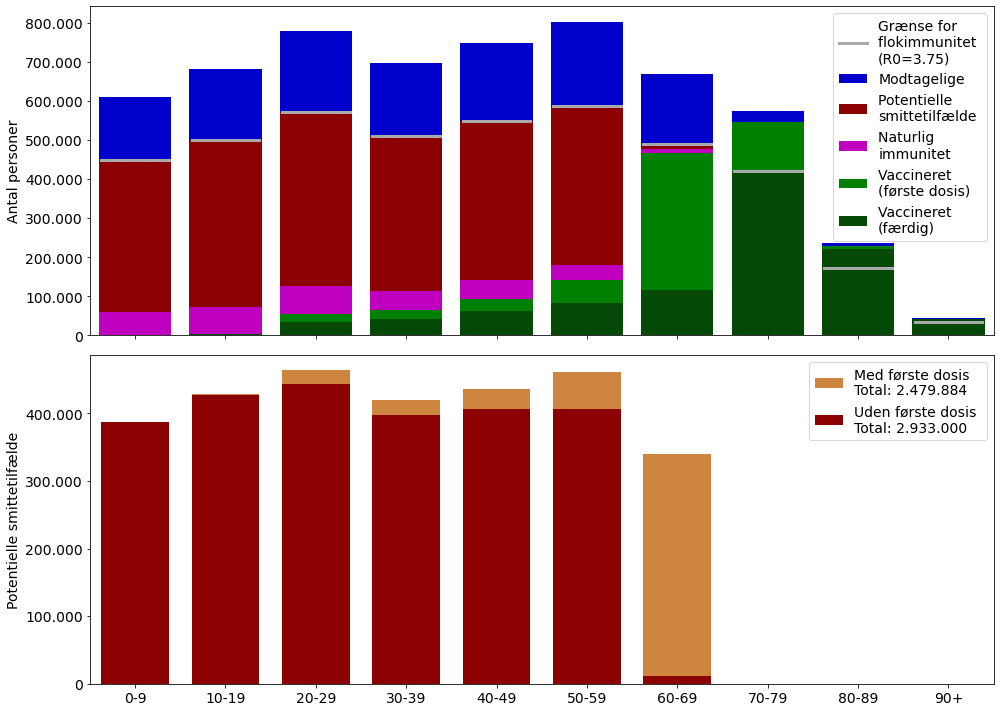

In [41]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

xVals = np.arange(0,10)

curWidth = 0.75

ax1.bar(xVals,DK_age,label='Modtagelige',color='mediumblue')
# ax1.bar(range(0,10),np.multiply(herdImmuList,DK_age),edgecolor='k',label='Grænse for flokimmunitet')
for k in range(0,10):
    # ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount[k],herdCount[k]],'k')
    ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount_winter[k],herdCount_winter[k]],'darkgrey')

# Plot an extra, for legend label
# ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount[k],herdCount[k]],'k',label=f'Grænse for \nflokimmunitet \n(R0={R0:1.2f})')
ax1.plot([k-curWidth/2,k+curWidth/2],[herdCount_winter[k],herdCount_winter[k]],'darkgrey',label=f'Grænse for \nflokimmunitet \n(R0={R0_winter:1.2f})')


ax1.bar(xVals,missImmuCount_winter+allImmuCount,color='darkred',label='Potentielle \nsmittetilfælde')
ax1.bar(xVals,allImmuCount,color='m',label='Naturlig \nimmunitet')
ax1.bar(xVals,vaccCount,color='g',label='Vaccineret \n(første dosis)')

# ax1.bar(xVals,missImmuFullCount+allImmuFullCount,color='darkred',label='Potentielle smittetilfælde')
# ax1.bar(xVals,allImmuFullCount,color='m',label='Naturlig immunitet')
ax1.bar(xVals,vaccFullCount,color='xkcd:darkgreen',label='Vaccineret \n(færdig)')


# curWidth = 0.4
# ax2.bar(xVals-curWidth/2,missImmuCount,width=curWidth,color='darkred',label='Ved immunitet efter først dosis')
# ax2.bar(xVals+curWidth/2,missImmuFullCount,width=curWidth,color='red',label='Ved immunitet efter anden dosis')
# ax2.bar(xVals,missImmuFullCount_winter,width=curWidth,color='peru',label='Med første dosis')
# ax2.bar(xVals,missImmuCount_winter,width=curWidth,color='darkred',label='Uden første dosis')
ax2.bar(xVals,missImmuFullCount_winter,width=curWidth,color='peru',label=f'Med første dosis \nTotal: {fullMissImmu_winter:,.0f}'.replace(',','.'))
ax2.bar(xVals,missImmuCount_winter,width=curWidth,color='darkred',label=f'Uden første dosis \nTotal: {fullMissImmuFull_winter:,.0f}'.replace(',','.'))
# ax2.bar(10,fullMissImmu,color='darkred')

ax1.set_xticks(xVals)
ax1.set_xticklabels(allCols[:-1])


# curTicks = np.append(xVals,10)
# curTickLabels = np.append(allCols[:-1],'Total')
# ax1.set_xticks(curTicks)
# ax1.set_xticklabels(curTickLabels)

ax1.set_xlim([-0.5,9.5])


# ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
# ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax1.legend(loc='upper right')
ax2.legend()

# Period as thousands separator
ax1.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)
ax2.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)


ax1.set_ylabel('Antal personer')
ax2.set_ylabel('Potentielle smittetilfælde')



plt.tight_layout()
if saveFigures:
    plt.savefig('figs/BefolkningModtagelige_winter')

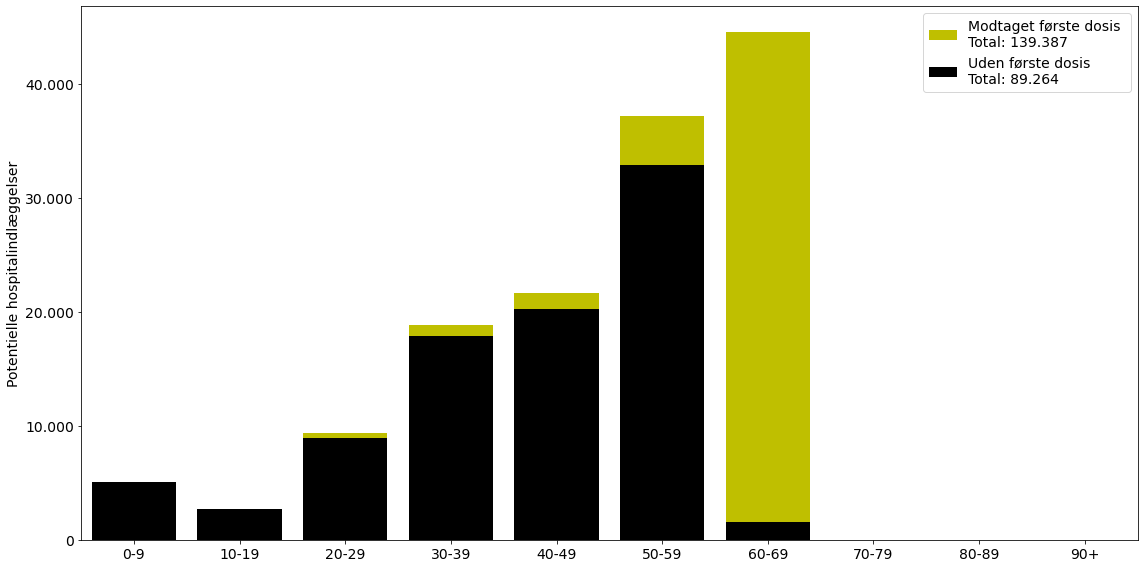

In [42]:
# Number of potential infections that will result in hospitalization
fig,ax1 = plt.subplots(1,1,figsize=(16,8))

xVals = np.arange(0,10)

ratioHosp = np.multiply(finalEstimates,0.01)

poteOneDose_winter = np.multiply(missImmuFullCount_winter,ratioHosp)
poteNoDose_winter = np.multiply(missImmuCount_winter,ratioHosp)

poteOneDoseTot_winter = poteOneDose_winter.sum()
poteNoDoseTot_winter = poteNoDose_winter.sum()


# ax1.bar(xVals,missImmuFullCount_winter,color='peru',label='Med første dosis')
# ax1.bar(xVals,missImmuCount_winter,color='darkred',label='Uden første dosis')
ax1.bar(xVals,poteOneDose_winter,color='y',label=f'Modtaget første dosis \nTotal: {poteOneDoseTot_winter:,.0f}'.replace(',','.'))
ax1.bar(xVals,poteNoDose_winter,color='k',label=f'Uden første dosis \nTotal: {poteNoDoseTot_winter:,.0f}'.replace(',','.'))

ax1.set_xticks(xVals)
ax1.set_xticklabels(allCols[:-1])

ax1.set_xlim([-0.5,9.5])


# ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax1.legend()
# Period as thousands separator
ax1.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)

ax1.set_ylabel('Potentielle hospitalindlæggelser')


plt.tight_layout()
if saveFigures:
    plt.savefig('figs/BefolkningHospitalisering_winter')

# Total antal indlæggelser indtil nu

In [43]:
dfAdm.tail()

Aldersgruppe,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
13_04_2021,182,185,593,899,1336,2112,2170,3099,2519,695,13790
20_04_2021,191,189,616,931,1373,2156,2209,3142,2531,697,14035
27_04_2021,196,194,634,961,1405,2202,2243,3166,2540,699,14240
04_05_2021,197,199,647,993,1440,2252,2283,3190,2547,702,14450
11_05_2021,206,209,675,1034,1483,2321,2331,3207,2559,704,14729


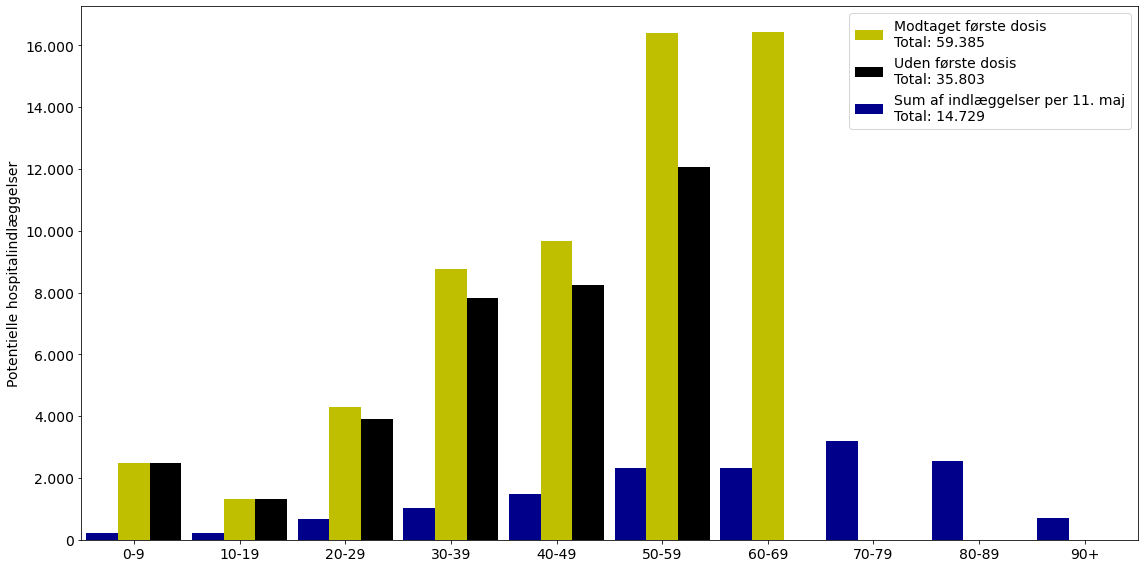

In [44]:
# Number of potential infections that will result in hospitalization
fig,ax1 = plt.subplots(1,1,figsize=(16,8))

xVals = np.arange(0,10)

ratioHosp = np.multiply(finalEstimates,0.01)

poteOneDose = np.multiply(missImmuFullCount,ratioHosp)
poteNoDose = np.multiply(missImmuCount,ratioHosp)

poteOneDoseTot = poteOneDose.sum()
poteNoDoseTot = poteNoDose.sum()

# ax1.bar(xVals,missImmuFullCount,width=curWidth,color='peru',label='Med første dosis')
# ax1.bar(xVals,missImmuCount,width=curWidth,color='darkred',label='Uden første dosis')

curWidth = 0.3
ax1.bar(xVals,poteOneDose,width=curWidth,color='y',label=f'Modtaget første dosis \nTotal: {poteOneDoseTot:,.0f}'.replace(',','.'))
ax1.bar(xVals+curWidth,poteNoDose,width=curWidth,color='k',label=f'Uden første dosis \nTotal: {poteNoDoseTot:,.0f}'.replace(',','.'))

admSoFar = dfAdm.iloc[-1,:-1]
admSoFarTotal = admSoFar.sum()
curDateToShow = curDates[-1].strftime('%d. %b')
ax1.bar(xVals-curWidth,admSoFar,width=curWidth,color='darkblue',label=f'Sum af indlæggelser per {curDateToShow}\nTotal: {admSoFarTotal:,.0f}'.replace(',','.'))

ax1.set_xticks(xVals)
ax1.set_xticklabels(allCols[:-1])

ax1.set_xlim([-0.5,9.5])


# ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax1.legend()
# Period as thousands separator
ax1.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)


ax1.set_ylabel('Potentielle hospitalindlæggelser')
# ax2.set_ylabel('Potentielle smittetilfælde')



plt.tight_layout()
if saveFigures:
    plt.savefig('figs/BefolkningHospitalisering_MedFaktiskeTal')

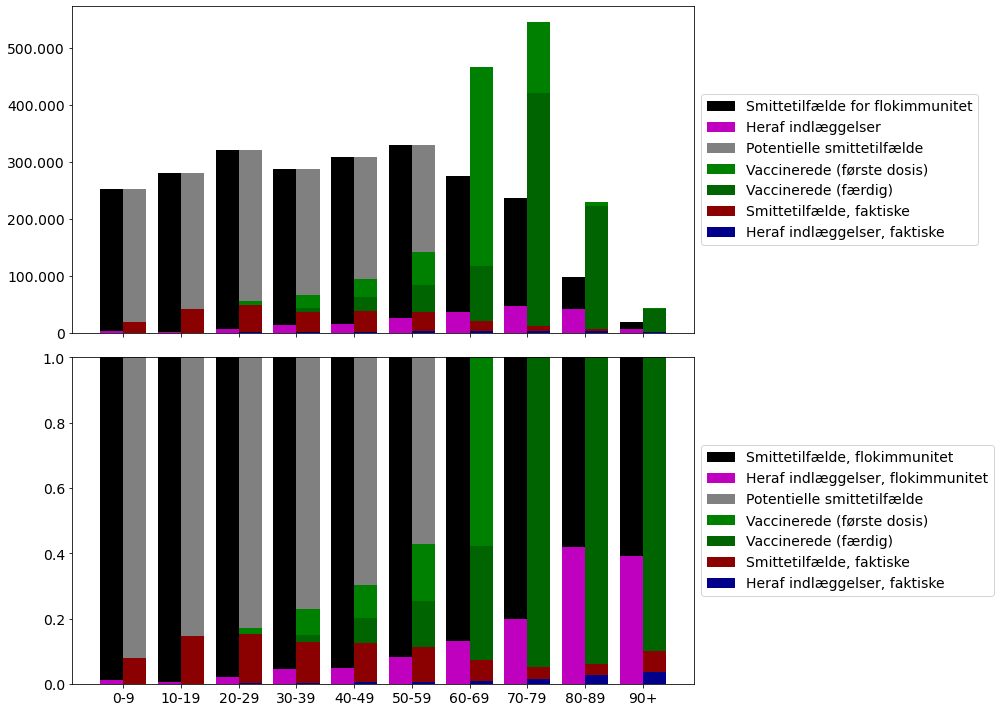

In [45]:
# Positiv vinkel: Hvor mange smittede/indlæggelser ville ren flokimmunitet have krævet, og hvor mange har vi undgået takket være vaccination (og nedlukning mens vi ventede på vaccinerne)
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

totAdmission = np.multiply(herdCount,ratioHosp)
totCase = dfCase.iloc[-1,:-1]

curWidth = 0.4

ax1.bar(xVals-curWidth/2,herdCount,width=curWidth,color='k',label='Smittetilfælde for flokimmunitet')
ax1.bar(xVals-curWidth/2,totAdmission,width=curWidth,color='m',label='Heraf indlæggelser')
ax1.bar(xVals+curWidth/2,herdCount,width=curWidth,color='grey',label='Potentielle smittetilfælde')
ax1.bar(xVals+curWidth/2,vaccCount,width=curWidth,color='green',label='Vaccinerede (første dosis)')
ax1.bar(xVals+curWidth/2,vaccFullCount,width=curWidth,color='darkgreen',label='Vaccinerede (færdig)')
ax1.bar(xVals+curWidth/2,totCase,width=curWidth,color='darkred',label='Smittetilfælde, faktiske')
ax1.bar(xVals+curWidth/2,admSoFar,width=curWidth,color='darkblue',label='Heraf indlæggelser, faktiske')
#,label=f'Sum af indlæggelser per {curDateToShow}\nTotal: {admSoFarTotal:,.0f}'.replace(',','.'))
# ax2.bar(xVals,herdRatio)

ax2.bar(xVals-curWidth/2,np.divide(herdCount,herdCount),width=curWidth,color='k',label='Smittetilfælde, flokimmunitet')
ax2.bar(xVals-curWidth/2,np.divide(totAdmission,herdCount),width=curWidth,color='m',label='Heraf indlæggelser, flokimmunitet')
ax2.bar(xVals+curWidth/2,np.divide(herdCount,herdCount),width=curWidth,color='grey',label='Potentielle smittetilfælde')
ax2.bar(xVals+curWidth/2,np.divide(vaccCount,herdCount),width=curWidth,color='green',label='Vaccinerede (første dosis)')
ax2.bar(xVals+curWidth/2,np.divide(vaccFullCount,herdCount),width=curWidth,color='darkgreen',label='Vaccinerede (færdig)')
ax2.bar(xVals+curWidth/2,np.divide(totCase,herdCount),width=curWidth,color='darkred',label='Smittetilfælde, faktiske')
ax2.bar(xVals+curWidth/2,np.divide(admSoFar,herdCount),width=curWidth,color='darkblue',label='Heraf indlæggelser, faktiske')

# ax1.set_xlim([-0.5,9.5])

ax2.set_ylim([0,1])

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
# ax1.legend(loc='upper right')
# ax2.legend()

ax1.set_xticks(xVals)
ax1.set_xticklabels(allCols[:-1])


# Period as thousands separator
ax1.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)
# ax2.get_yaxis().set_major_formatter(
#     plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
# )


# ax1.set_ylabel('Antal personer')
# ax2.set_ylabel('Potentielle smittetilfælde')

plt.tight_layout()
# if saveFigures:
#     plt.savefig('figs/BefolkningModtagelige')

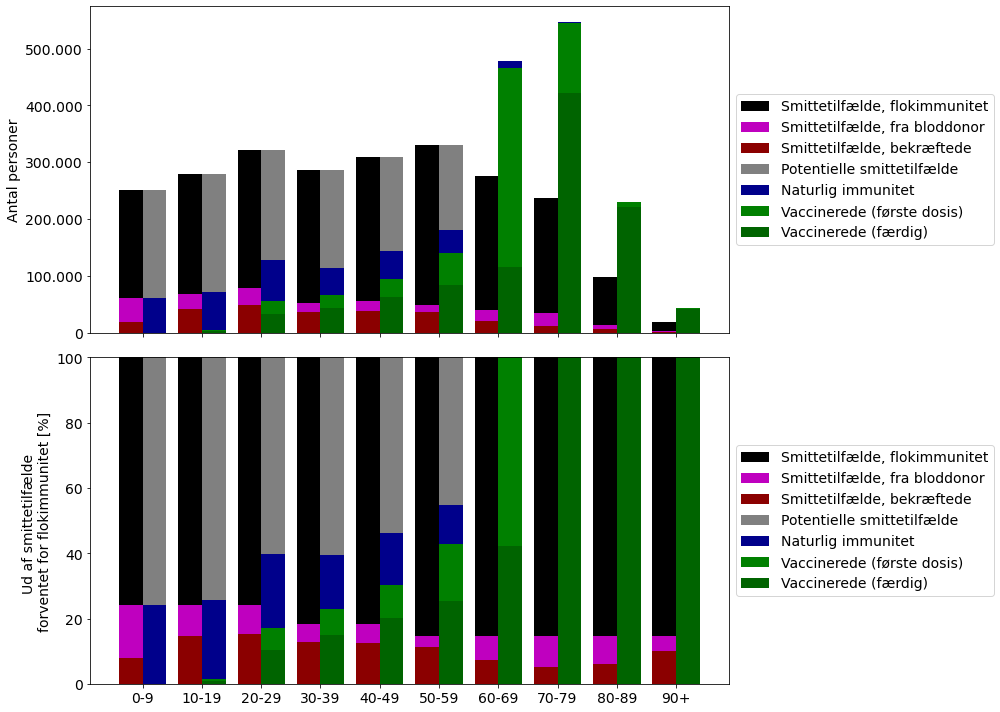

In [46]:
# Positiv vinkel: Hvor mange smittede/indlæggelser ville ren flokimmunitet have krævet, og hvor mange har vi undgået takket være vaccination (og nedlukning mens vi ventede på vaccinerne)
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

totAdmission = np.multiply(herdCount,ratioHosp)
totCase = dfCase.iloc[-1,:-1]

curWidth = 0.4

# ax1.bar(xVals,missImmuCount+allImmuCount,color='darkred',label='Potentielle \nsmittetilfælde')
# ax1.bar(xVals,allImmuCount,color='m',label='Naturlig \nimmunitet')
# ax1.bar(xVals,vaccCount,color='g',label='Vaccineret \n(første dosis)')
# ax1.bar(xVals,vaccFullCount,color='xkcd:darkgreen',label='Vaccineret \n(færdig)')


ax1.bar(xVals-curWidth/2,herdCount,width=curWidth,color='k',label='Smittetilfælde, flokimmunitet')
# ax1.bar(xVals-curWidth/2,totAdmission,width=curWidth,color='r',label='Heraf indlæggelser')
ax1.bar(xVals-curWidth/2,immuCount,width=curWidth,color='m',label='Smittetilfælde, fra bloddonor')
ax1.bar(xVals-curWidth/2,totCase,width=curWidth,color='darkred',label='Smittetilfælde, bekræftede')
ax1.bar(xVals+curWidth/2,herdCount,width=curWidth,color='grey',label='Potentielle smittetilfælde',zorder=-1)
ax1.bar(xVals+curWidth/2,allImmuCount,width=curWidth,color='darkblue',label='Naturlig immunitet')
ax1.bar(xVals+curWidth/2,vaccCount,width=curWidth,color='green',label='Vaccinerede (første dosis)')
ax1.bar(xVals+curWidth/2,vaccFullCount,width=curWidth,color='darkgreen',label='Vaccinerede (færdig)')
# ax1.bar(xVals+curWidth/2,admSoFar,width=curWidth,color='darkblue',label='Indlæggelser, faktiske')

# ax1.bar(xVals-curWidth/2,totAdmission,width=curWidth,color='m',label='Heraf indlæggelser')
# ax1.bar(xVals+curWidth/2,herdCount,width=curWidth,color='grey',label='Potentielle smittetilfælde')
# ax1.bar(xVals+curWidth/2,vaccCount,width=curWidth,color='green',label='Vaccinerede (første dosis)')
# ax1.bar(xVals+curWidth/2,vaccFullCount,width=curWidth,color='darkgreen',label='Vaccinerede (færdig)')
# ax1.bar(xVals+curWidth/2,admSoFar,width=curWidth,color='darkblue',label='Heraf indlæggelser, faktiske')
#,label=f'Sum af indlæggelser per {curDateToShow}\nTotal: {admSoFarTotal:,.0f}'.replace(',','.'))
# ax2.bar(xVals,herdRatio)


ax2.bar(xVals-curWidth/2,100 * np.divide(herdCount,herdCount),width=curWidth,color='k',label='Smittetilfælde, flokimmunitet')
ax2.bar(xVals-curWidth/2,100 * np.divide(immuCount,herdCount),width=curWidth,color='m',label='Smittetilfælde, fra bloddonor')
ax2.bar(xVals-curWidth/2,100 * np.divide(totCase,herdCount),width=curWidth,color='darkred',label='Smittetilfælde, bekræftede')
ax2.bar(xVals+curWidth/2,100 * np.divide(herdCount,herdCount),width=curWidth,color='grey',label='Potentielle smittetilfælde',zorder=-1)
ax2.bar(xVals+curWidth/2,100 * np.divide(allImmuCount,herdCount),width=curWidth,color='darkblue',label='Naturlig immunitet')
ax2.bar(xVals+curWidth/2,100 * np.divide(vaccCount,herdCount),width=curWidth,color='green',label='Vaccinerede (første dosis)')
ax2.bar(xVals+curWidth/2,100 * np.divide(vaccFullCount,herdCount),width=curWidth,color='darkgreen',label='Vaccinerede (færdig)')

# ax2.bar(xVals-curWidth/2,np.divide(herdCount,herdCount),width=curWidth,color='k',label='Smittetilfælde, flokimmunitet')
# ax2.bar(xVals-curWidth/2,np.divide(totCase,herdCount),width=curWidth,color='darkred',label='Smittetilfælde, faktiske')
# # ax2.bar(xVals-curWidth/2,np.divide(totAdmission,herdCount),width=curWidth,color='m',label='Heraf indlæggelser, flokimmunitet')
# ax2.bar(xVals+curWidth/2,np.divide(herdCount,herdCount),width=curWidth,color='grey',label='Potentielle smittetilfælde')
# ax2.bar(xVals+curWidth/2,np.divide(vaccCount,herdCount),width=curWidth,color='green',label='Vaccinerede (første dosis)')
# ax2.bar(xVals+curWidth/2,np.divide(vaccFullCount,herdCount),width=curWidth,color='darkgreen',label='Vaccinerede (færdig)')
# # ax2.bar(xVals+curWidth/2,np.divide(admSoFar,herdCount),width=curWidth,color='darkblue',label='Heraf indlæggelser, faktiske')

# ax1.set_xlim([-0.5,9.5])

ax2.set_ylim([0,100])

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
# ax1.legend(loc='upper right')
# ax2.legend()

ax1.set_xticks(xVals)
ax1.set_xticklabels(allCols[:-1])


# Period as thousands separator
ax1.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)
# ax2.get_yaxis().set_major_formatter(
#     plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
# )


ax1.set_ylabel('Antal personer')
ax2.set_ylabel('Ud af smittetilfælde \nforventet for flokimmunitet [%]')

plt.tight_layout()
if saveFigures:
    plt.savefig('figs/BefolkningAvoidedCases')

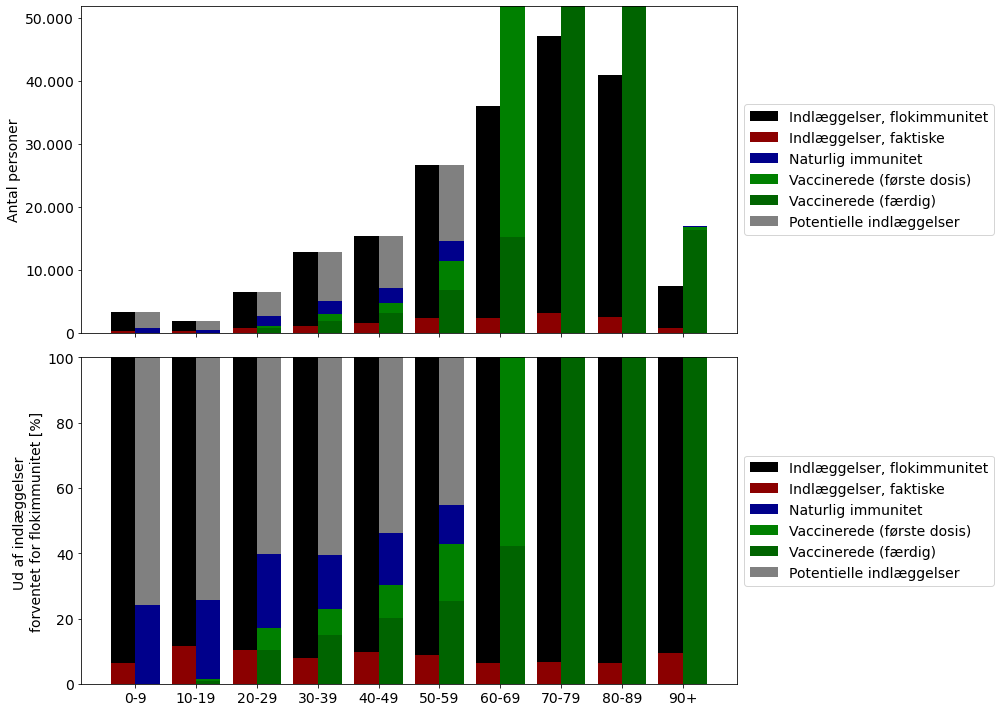

In [47]:
# Positiv vinkel: Hvor mange indlæggelser ville ren flokimmunitet have krævet, og hvor mange har vi undgået takket være vaccination (og nedlukning mens vi ventede på vaccinerne)
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

totAdmission = np.multiply(herdCount,ratioHosp)
totCase = dfCase.iloc[-1,:-1]

admAvoid = np.multiply(allImmuCount,ratioHosp)
admLeft = totAdmission - admAvoid

curWidth = 0.4


ax1.bar(xVals-curWidth/2,totAdmission,width=curWidth,color='k',label='Indlæggelser, flokimmunitet')
ax1.bar(xVals-curWidth/2,admSoFar,width=curWidth,color='darkred',label='Indlæggelser, faktiske')
ax1.bar(xVals+curWidth/2,np.multiply(allImmuCount,ratioHosp),width=curWidth,color='darkblue',label='Naturlig immunitet')
ax1.bar(xVals+curWidth/2,np.multiply(vaccCount,ratioHosp),width=curWidth,color='green',label='Vaccinerede (første dosis)')
ax1.bar(xVals+curWidth/2,np.multiply(vaccFullCount,ratioHosp),width=curWidth,color='darkgreen',label='Vaccinerede (færdig)')
ax1.bar(xVals+curWidth/2,totAdmission,width=curWidth,color='grey',label='Potentielle indlæggelser',zorder=-1)


ax2.bar(xVals-curWidth/2,100 * np.divide(totAdmission,totAdmission),width=curWidth,color='k',label='Indlæggelser, flokimmunitet')
ax2.bar(xVals-curWidth/2,100 * np.divide(admSoFar,totAdmission),width=curWidth,color='darkred',label='Indlæggelser, faktiske')
ax2.bar(xVals+curWidth/2,100 * np.divide(np.multiply(allImmuCount,ratioHosp),totAdmission),width=curWidth,color='darkblue',label='Naturlig immunitet')
ax2.bar(xVals+curWidth/2,100 * np.divide(np.multiply(vaccCount,ratioHosp),totAdmission),width=curWidth,color='green',label='Vaccinerede (første dosis)')
ax2.bar(xVals+curWidth/2,100 * np.divide(np.multiply(vaccFullCount,ratioHosp),totAdmission),width=curWidth,color='darkgreen',label='Vaccinerede (færdig)')
ax2.bar(xVals+curWidth/2,100 * np.divide(totAdmission,totAdmission),width=curWidth,color='grey',label='Potentielle indlæggelser',zorder=-1)



ax1.set_ylim(top=max(totAdmission)*1.1)
ax2.set_ylim([0,100])

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

ax1.set_xticks(xVals)
ax1.set_xticklabels(allCols[:-1])


# Period as thousands separator
ax1.get_yaxis().set_major_formatter(
    plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.'))
)


ax1.set_ylabel('Antal personer')
ax2.set_ylabel('Ud af indlæggelser \nforventet for flokimmunitet [%]')

plt.tight_layout()
if saveFigures:
    plt.savefig('figs/BefolkningAvoidedAdmissions')

# OLD

In [ ]:
# ratioVacc = np.divide(doneVacc,DK_age)

# allImmuRate = 0.08 # Assuming same natural immunity rate for everyone
# ratioImmu = allImmuRate * np.ones(DK_age.shape)
# # Seroprevalence, bloddonerer, uge 16:
# # 17-29: 9,6%
# # 30-49: 6,3%
# # 50-69: 5,0%
# # I alt: 6,7%
# imm0_29 = 0.1
# imm30_49 = 0.075
# imm50_69 = 0.06
# ratioImmu = [imm0_29,imm0_29,imm0_29,imm30_49,imm30_49,imm50_69,imm50_69,imm50_69,imm50_69,imm50_69]

# # R0 = 2.5
# R0 = 2.5 * 1.5
# # R0 = 1.7
# herdImmunityThreshold = 1-(1/R0)
# herdImmuList = herdImmunityThreshold * np.ones(DK_age.shape)

# curImmu = ratioVacc + ratioImmu - np.multiply(ratioVacc,ratioImmu)

# missingToInfectRatio = herdImmuList - curImmu 
# # - ratioVacc - ratioImmu + np.multiply(ratioVacc,ratioImmu)

# print(ratioVacc)
# print(ratioImmu)
# print(herdImmuList)
# print(missingToInfectRatio)

# # If below zero, set to zero
# missingToInfectRatio[missingToInfectRatio < 0] = 0

# print(missingToInfectRatio)

# missingToInfectCount = np.multiply(missingToInfectRatio,DK_age)
# # print(missingToInfectCount)


In [ ]:
# np.multiply(herdImmuList,DK_age)

In [ ]:

# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# curWidth = 0.7

# ax1.bar(range(0,10),DK_age,label='Modtagelige',color='b')
# # ax1.bar(range(0,10),missingToInfectCount)
# # ax1.bar(range(0,10),np.multiply(herdImmuList,DK_age),label='Grænse for flokimmunitet')
# ax1.bar(range(0,10),np.multiply(herdImmuList,DK_age),edgecolor='k',label='Grænse for flokimmunitet')
# for k in range(0,10):
#     ax1.plot(k+[-curWidth,curWidth],[np.multiply(herdImmuList,DK_age)[k],np.multiply(herdImmuList,DK_age)[k]],'k')

# # ax1.bar(range(0,10),doneVacc+np.multiply(ratioImmu,DK_age))
# # ax1.bar(range(0,10),np.multiply(ratioImmu,DK_age))
# ax1.bar(range(0,10),np.multiply(curImmu,DK_age),color='m',label='Naturlig immunitet')
# ax1.bar(range(0,10),doneVacc,color='g',label='Vaccineret')

# ax2.bar(range(0,10),np.ones(DK_age.shape),color='b',label='Modtagelige')
# # ax2.bar(range(0,10),herdImmuList)
# ax2.plot([0,10],herdImmunityThreshold*np.ones((2,)),'k',label='Grænse for flokimmunitet')
# ax2.bar(range(0,10),curImmu,label='Naturlig immunitet')
# ax2.bar(range(0,10),ratioVacc,label='Vaccineret')

# ax1.legend()
# ax2.legend()
# plt.tight_layout()